In [1]:
import os, sys
import numpy as np
from termcolor import cprint

model_name='model_best_normal_0.pt'  
out_name='submission_normal_0.npy'  

In [2]:
#outputs_path='./outputs/2024-07-01/18-51-26/'
#outputs_path='./outputs/2024-07-03/19-21-55/'
#outputs_path='./outputs/2024-07-03/23-49-33/'
outputs_path='./outputs/2024-07-04/21-21-25/'
id_list=['_0', '_1', '_2', '_3']
#aug_list=['_normal', '_spectgram', '_spectgram_log', '_bandpass_l', '_bandpass_h', '_filter120hz+spect', '_spectgram120hz']


出力ファイルの表示

(4108, 1854) (4108,)
(4108, 1854)


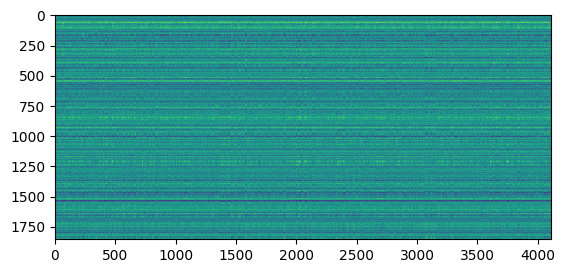

In [3]:
import matplotlib.pyplot as plt
aug='_bandpass_40'
arr=np.load(outputs_path+'submission'+aug+id_list[0]+'.npy')
arr_ave=np.mean(arr, axis=1)
print(arr.shape, arr_ave.shape)
arr_ave=np.tile(arr_ave, (arr.shape[1],1)).T
print(arr_ave.shape)
plt.imshow((arr-arr_ave).T, vmin=-3, vmax=3)

(-5.0, 5.0)

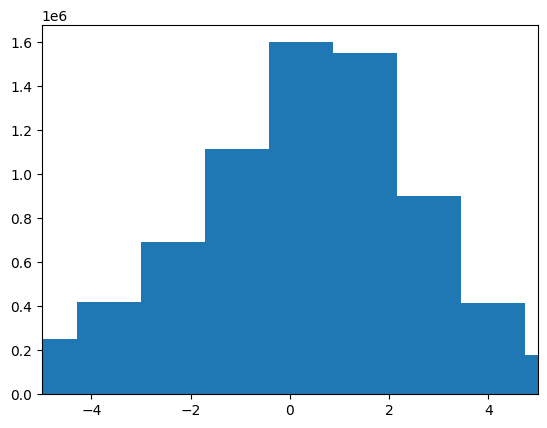

In [4]:
plt.hist((arr-arr_ave).flatten(), bins=50)
plt.xlim(-5,5)

出力ファイルのマージ

In [5]:
aug='_bandpass_40'
for i, id in enumerate(id_list):
    tmp=np.load(outputs_path+'submission'+aug+id+'.npy')
    if i==0:
        arr=tmp
    else:
        arr=np.concatenate((arr, tmp), axis=0)

np.save(os.path.join(outputs_path, 'submission'+aug), arr)
cprint(f"Submission {arr.shape} saved at {outputs_path}", "cyan")

Submission (16432, 1854) saved at ./outputs/2024-07-04/21-21-25/


アンサンブル

In [5]:
outputs_path1='./outputs/2024-07-01/08-15-37/'
outputs_path2='./outputs/2024-07-01/18-51-26/'
arr0=np.load(outputs_path1+'submission'+aug_list[0]+'.npy')
arr1=np.load(outputs_path2+'submission'+aug_list[1]+'.npy')
arr2=np.load(outputs_path1+'submission'+aug_list[3]+'.npy')
arr3=np.load(outputs_path1+'submission'+aug_list[4]+'.npy')
arr=(arr0+arr1+arr2+arr3)/4
np.save(os.path.join(outputs_path2, 'submission'), arr)
cprint(f"Submission {arr.shape} saved at {outputs_path}", "cyan")

Submission (16432, 1854) saved at ./outputs/2024-07-01/18-51-26/
